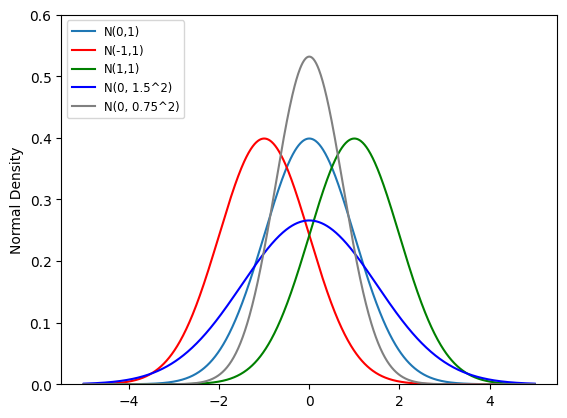

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, lognorm
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import seaborn as sns

# Density curves of various univariate normal distributions:
x = np.linspace(-5, 5, 1000)
plt.plot(x, norm.pdf(x), label='N(0,1)')
plt.ylim(0, 0.6)
plt.ylabel("Normal Density")
plt.plot(x, norm.pdf(x, loc=-1), color='red', label='N(-1,1)')
plt.plot(x, norm.pdf(x, loc=1), color='green', label='N(1,1)')
plt.plot(x, norm.pdf(x, scale=1.5), color='blue', label='N(0, 1.5^2)')
plt.plot(x, norm.pdf(x, scale=0.75), color='gray', label='N(0, 0.75^2)')

plt.legend(loc='upper left', fontsize='small')
plt.show()

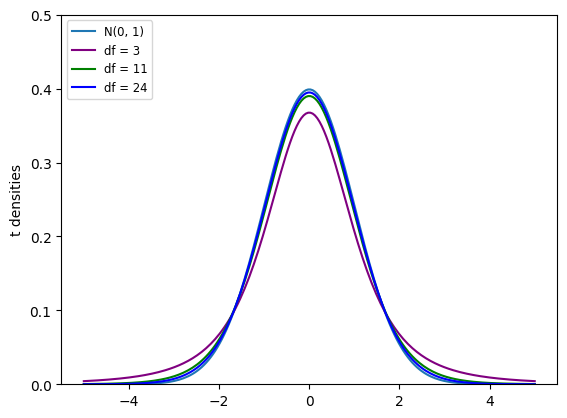

In [3]:
# Density curves of various t distributions:
x = np.linspace(-5, 5, 200)
plt.plot(x, norm.pdf(x), label='N(0, 1)')
plt.ylim(0, 0.5)
plt.ylabel("t densities")
plt.plot(x, t.pdf(x, 3), color='purple', label='df = 3')
plt.plot(x, t.pdf(x, 11), color='green', label='df = 11')
plt.plot(x, t.pdf(x, 24), color='blue', label='df = 24')

plt.legend(loc='upper left', fontsize='small')
plt.show()

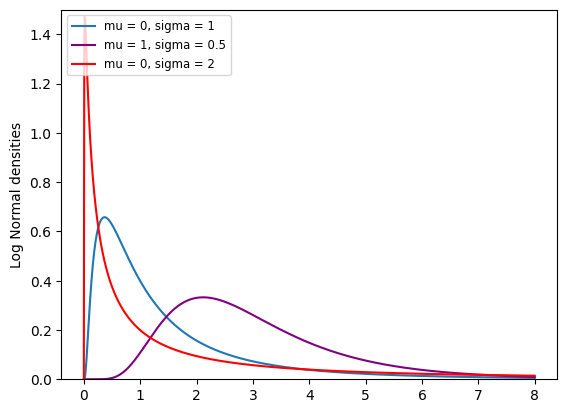

In [4]:
# Density curves of various log-normal distributions:
x = np.linspace(0, 8, 1000)
plt.plot(x, lognorm.pdf(x, s=1, scale=np.exp(0)), label='mu = 0, sigma = 1')
plt.ylim(0, 1.5)
plt.ylabel("Log Normal densities")
plt.plot(x, lognorm.pdf(x, s=0.5, scale=np.exp(1)), color='purple', label='mu = 1, sigma = 0.5')
plt.plot(x, lognorm.pdf(x, s=2, scale=np.exp(0)), color='red', label='mu = 0, sigma = 2')

plt.legend(loc='upper left', fontsize='small')
plt.show()

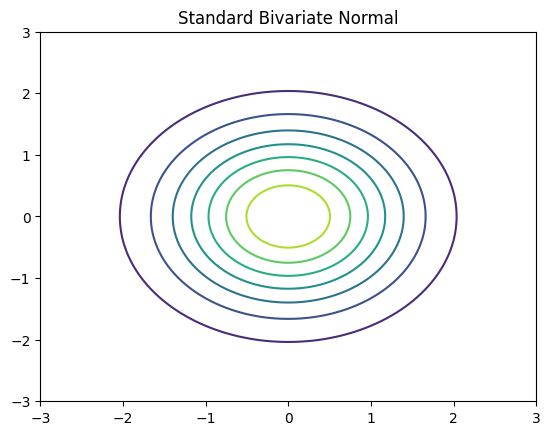

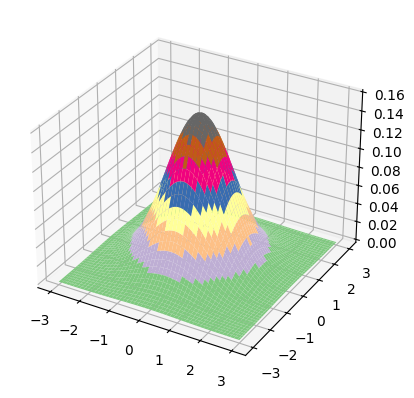

In [7]:
# Bivariate normal example
# Create the grid first
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Standard bivariate normal
Z1 = (1/(2 * np.pi)) * np.exp(- (X**2 + Y**2) / 2)

plt.contour(X, Y, Z1)
plt.title('Standard Bivariate Normal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap='Accent')
plt.show()

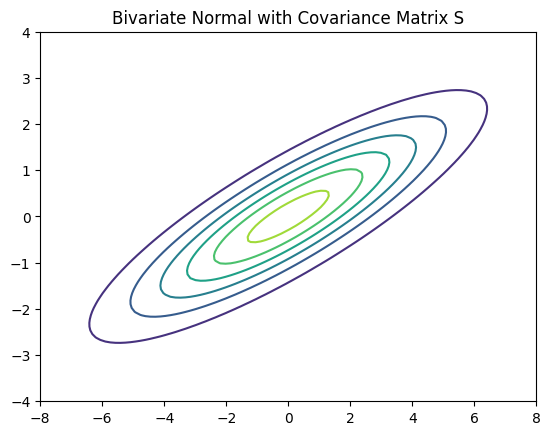

In [8]:
# Any bivariate normal
x = np.linspace(-8, 8, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# S is the covariance matrix
S = np.array([[11, 4], [4, 2]])
d = np.linalg.det(S)
Z2 = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        Z2[i, j] = (1/(2 * np.pi * np.sqrt(d))) * np.exp(-0.5 * (np.array([X[i, j], Y[i, j]]).T @ np.linalg.inv(S) @ np.array([X[i, j], Y[i, j]])))

plt.contour(X, Y, Z2)
plt.title('Bivariate Normal with Covariance Matrix S')
plt.show()

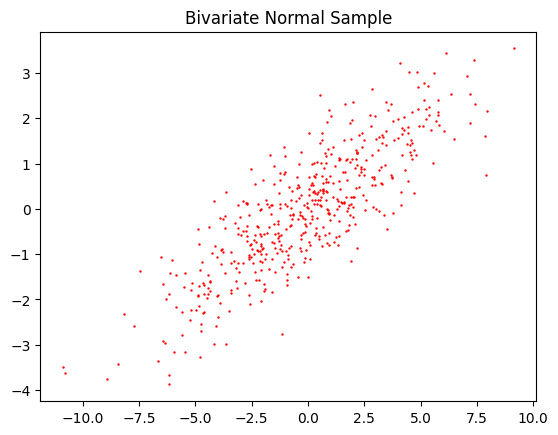

In [9]:
# Simulate bivariate normal data
mu = np.array([0, 0])
Sigma = S
bivn = np.random.multivariate_normal(mu, Sigma, 500)

plt.scatter(bivn[:, 0], bivn[:, 1], color='red', s=0.5)
plt.title('Bivariate Normal Sample')
plt.show()


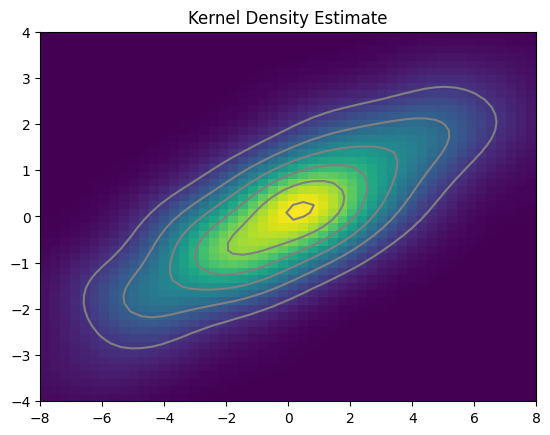

In [11]:
# Calculate kernel density estimate
kde = KDEMultivariate(data=bivn, var_type='cc', bw='normal_reference')
x_kde = np.linspace(-8, 8, 50)
y_kde = np.linspace(-4, 4, 50)
X_kde, Y_kde = np.meshgrid(x_kde, y_kde)
Z_kde = kde.pdf(np.array([X_kde.ravel(), Y_kde.ravel()])).reshape(X_kde.shape)

plt.imshow(Z_kde, extent=(-8, 8, -4, 4), origin='lower', aspect='auto')
plt.contour(X_kde, Y_kde, Z_kde, colors='gray')
plt.title('Kernel Density Estimate')
plt.show()

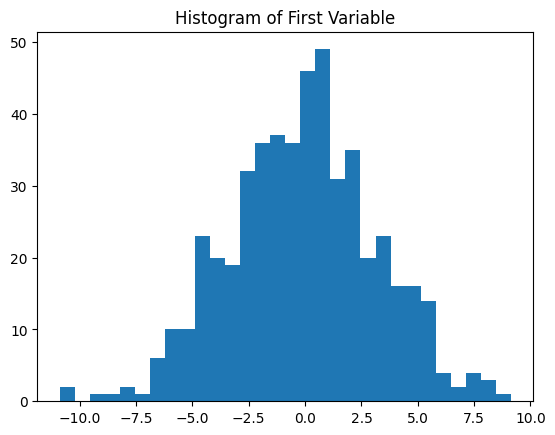

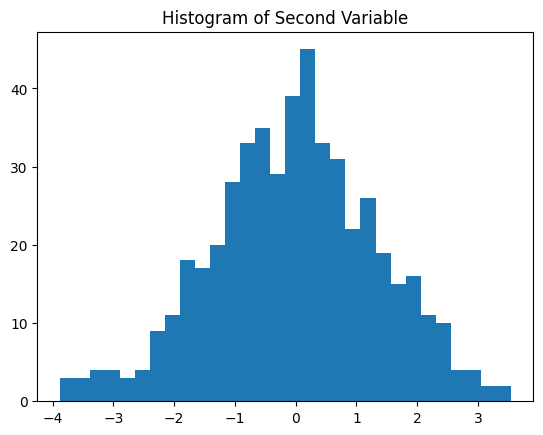

In [12]:
# Histograms
plt.hist(bivn[:, 0], bins=30)
plt.title('Histogram of First Variable')
plt.show()

plt.hist(bivn[:, 1], bins=30)
plt.title('Histogram of Second Variable')
plt.show()

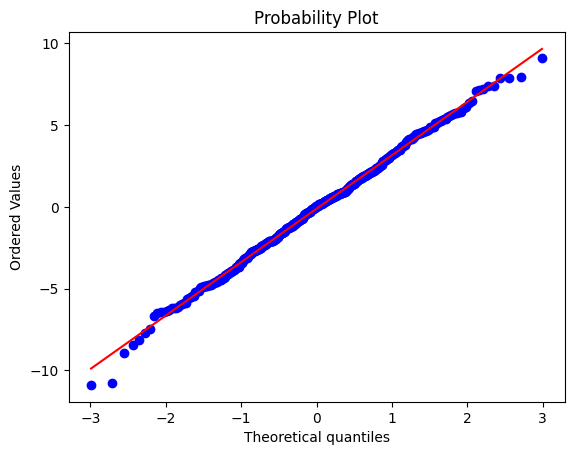

In [15]:
# QQ plot
import numpy as np
import pylab
import scipy.stats as stats

measurements = bivn[:, 0]
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()